# Analyse BlueSeis BSPF Events

In [1]:
import os
import obspy as obs

from obspy.clients.fdsn import Client

In [2]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'

## Configurations

In [12]:
config = {}

## output path for figures
config['path_to_figs'] = data_path+"BSPF/figures/M62_event/"


## BSPF coordinates
config['BSPF_lon'] = -116.455439
config['BSPF_lat'] = 33.610643

## Eventtime
config['eventtime'] = obs.UTCDateTime("2022-11-22 16:32:00")

## Event M62
config['tbeg'] = obs.UTCDateTime("2022-11-22 16:38:00")
config['tend'] = obs.UTCDateTime("2022-11-22 16:45:00")

config['fmin'] = 0.1
config['fmax'] = 2.0

## Load Data

In [4]:
event = Client("USGS").get_events(starttime=config['tbeg'],endtime=config['tend'],minmagnitude=6.0)
event = event[0]

In [5]:
st = obs.read("./event62_6C.mseed")

st.resample(40)

6 Trace(s) in Stream:
PY.BSPF..HJE  | 2022-11-22T16:37:00.001000Z - 2022-11-22T16:52:59.976000Z | 40.0 Hz, 38400 samples
PY.BSPF..HJN  | 2022-11-22T16:37:00.001000Z - 2022-11-22T16:52:59.976000Z | 40.0 Hz, 38400 samples
PY.BSPF..HJZ  | 2022-11-22T16:37:00.001000Z - 2022-11-22T16:52:59.976000Z | 40.0 Hz, 38400 samples
II.PFO.10.BHN | 2022-11-22T16:37:00.019538Z - 2022-11-22T16:52:59.994538Z | 40.0 Hz, 38400 samples
II.PFO.10.BHE | 2022-11-22T16:37:00.019538Z - 2022-11-22T16:52:59.994538Z | 40.0 Hz, 38400 samples
II.PFO.10.BHZ | 2022-11-22T16:37:00.019538Z - 2022-11-22T16:52:59.994538Z | 40.0 Hz, 38400 samples

In [6]:
st.detrend("linear").taper(0.1).filter("bandpass", freqmin=config['fmin'], freqmax=config['fmax'], corners=4, zerophase=True)

6 Trace(s) in Stream:
PY.BSPF..HJE  | 2022-11-22T16:37:00.001000Z - 2022-11-22T16:52:59.976000Z | 40.0 Hz, 38400 samples
PY.BSPF..HJN  | 2022-11-22T16:37:00.001000Z - 2022-11-22T16:52:59.976000Z | 40.0 Hz, 38400 samples
PY.BSPF..HJZ  | 2022-11-22T16:37:00.001000Z - 2022-11-22T16:52:59.976000Z | 40.0 Hz, 38400 samples
II.PFO.10.BHN | 2022-11-22T16:37:00.019538Z - 2022-11-22T16:52:59.994538Z | 40.0 Hz, 38400 samples
II.PFO.10.BHE | 2022-11-22T16:37:00.019538Z - 2022-11-22T16:52:59.994538Z | 40.0 Hz, 38400 samples
II.PFO.10.BHZ | 2022-11-22T16:37:00.019538Z - 2022-11-22T16:52:59.994538Z | 40.0 Hz, 38400 samples

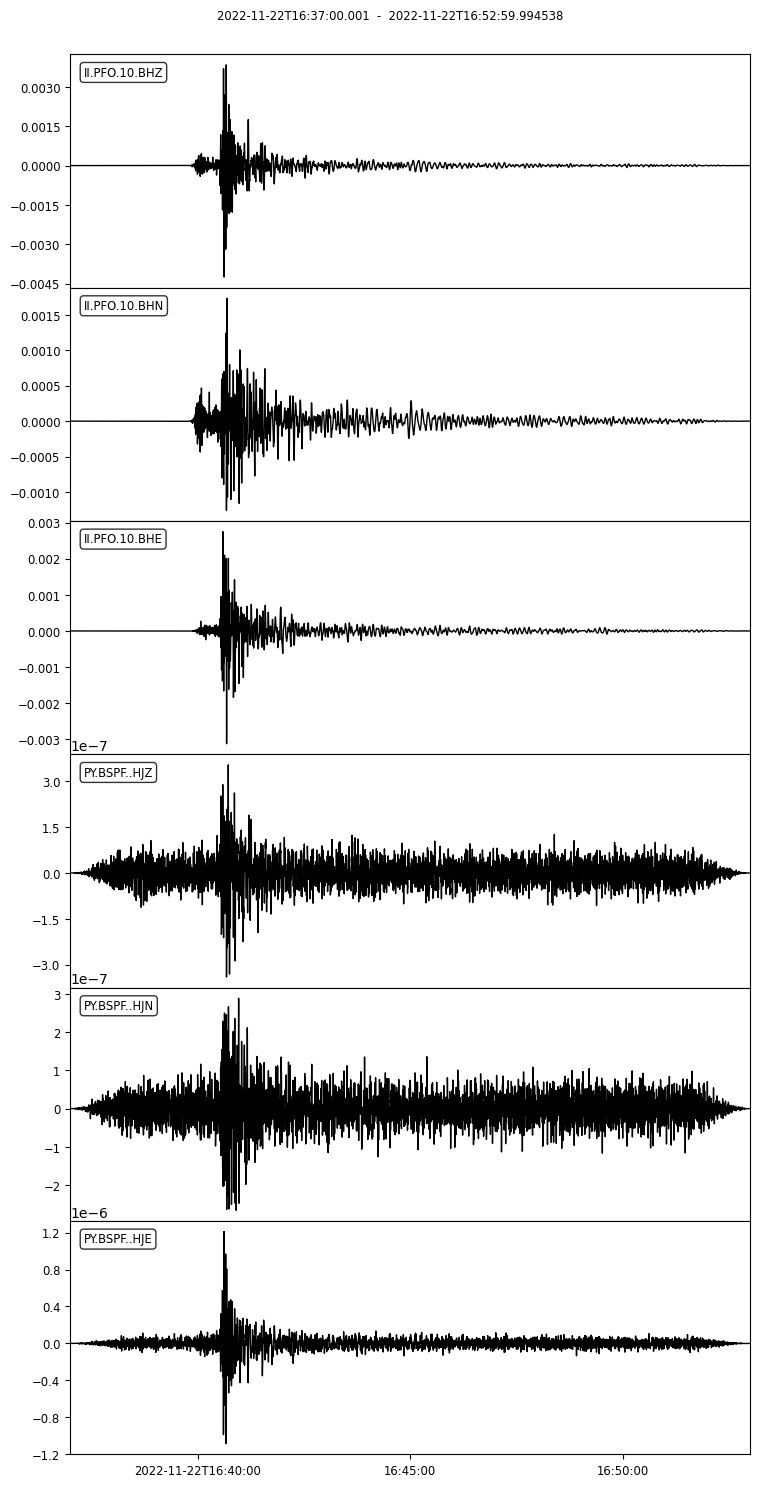

In [7]:
st.plot(equal_scale=False);

In [8]:
acc = st.select(station="PFO*")
rot = st.select(station="BSPF")

## Backazimuth

In [9]:
from functions.compute_backazimuth import __compute_backazimuth

In [13]:
config['station_longitude'] = config['BSPF_lon']
config['station_latitude']  = config['BSPF_lat']



## specify window length for baz estimation in seconds
config['win_length_sec'] = 3

## define an overlap for the windows in percent (50 -> 50%)
config['overlap'] = 50

## specify steps for degrees of baz
config['step'] = 1

In [14]:
out = __compute_backazimuth(
                            acc,
                            rot,
                            config,
                            wave_type='love',
                            event=event,
                            plot=True,
                            show_details=False,
)

out['fig'].savefig(config['path_to_figs']+f"BSPF_M62_baz_love.png", dpi=200, bbox_inches='tight', pad_inches=0.05)


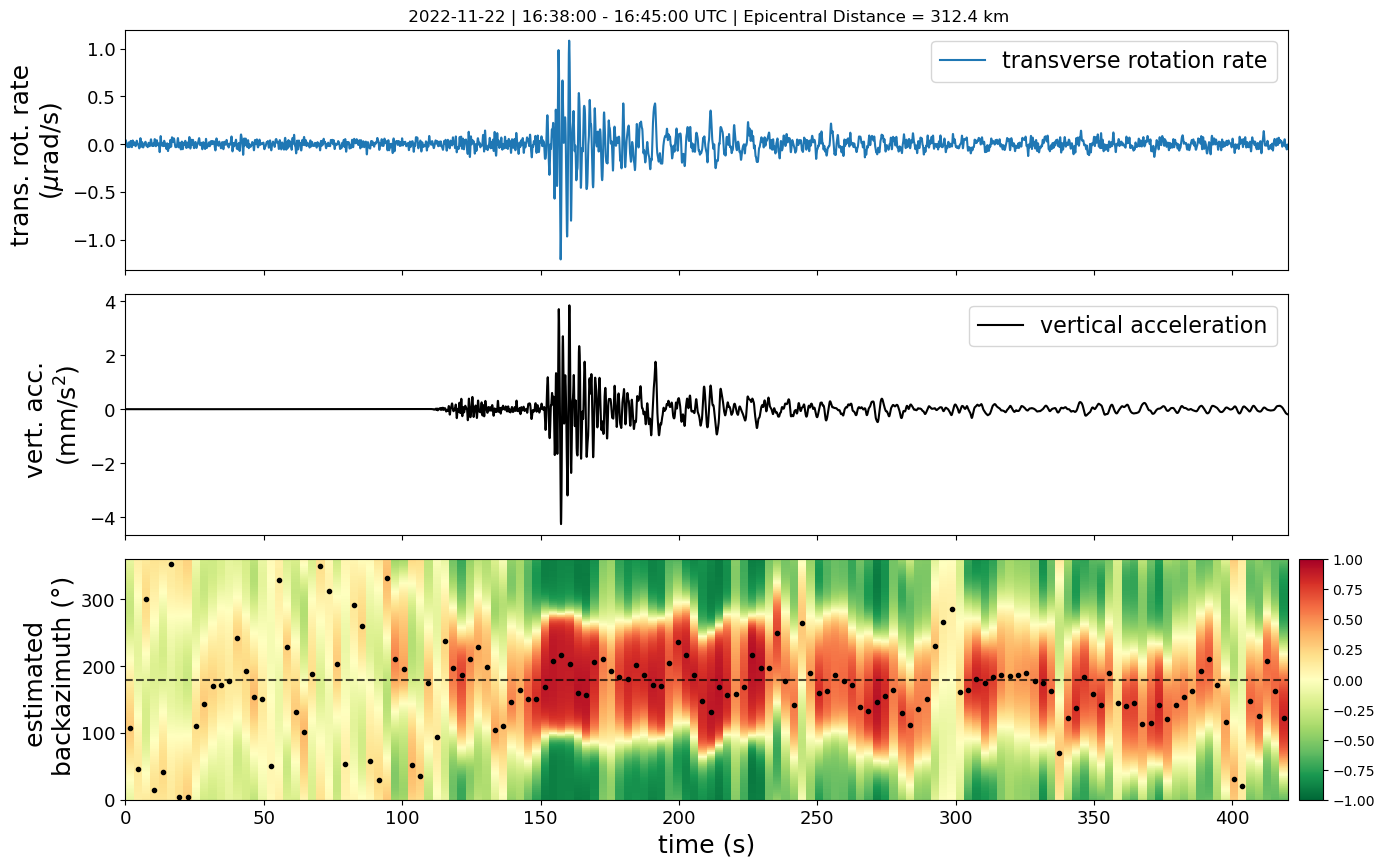

In [15]:
out = __compute_backazimuth(
                            acc,
                            rot,
                            config,
                            wave_type='rayleigh',
                            event=event,
                            plot=True,
                            show_details=False,
)

out['fig'].savefig(config['path_to_figs']+f"BSPF_M62_baz_rayleigh.png", dpi=200, bbox_inches='tight', pad_inches=0.05)


In [16]:
from functions.compute_backazimuth_tangent import __compute_backazimuth_tangent